In [50]:
#importing libraries
from data_loader import FootballDataLoader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU


In [51]:
#Processing the data
data_dir = r"\Users\kirlo\Documents\Sanvi University Work\Year 3\AML\final project\FootballData\RestructuredData_2425"  # replace with your actual data directory
team = "FCK"         
data_retriever = FootballDataLoader(data_dir, team)
all_games = data_retriever.load_all_games()
data_loader = all_games[0]

Reading game 1: Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Loading Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Data read.
Time shape: (155541, 2)
Ball shape: (155541, 6)
Team shape: (155541, 55)
Opponent shape: (155541, 55)
Total shape: (88002, 118)


In [52]:
data_loader.head()
data_loader.shape

(88002, 118)

In [53]:
#Preparing the model for the RNN
n_time_steps = data_loader.shape[0]
positions = data_loader[['FCKplayer_0_x', 'FCKplayer_0_y']].values 

#we need a 3D array for the RNN, using the time, x, and y dimensions
X = []
y = []

for i in range(n_time_steps - 1):
    X.append(positions[i])
    y.append(positions[i + 1])
X = np.array(X)
y = np.array(y)

#Reshaping with the sliding window
window_size = 5
X_reshaped = []
y_reshaped = []
for i in range(len(X) - window_size):
    X_reshaped.append(X[i:i + window_size])
    y_reshaped.append(y[i + window_size])
X_reshaped = np.array(X_reshaped)
y_reshaped = np.array(y_reshaped)
X_reshaped.shape, y_reshaped.shape

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70396, 5, 2), (17600, 5, 2), (70396, 2), (17600, 2))

In [54]:
#Creating a simple RNN model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(SimpleRNN(64))
model.add(Dense(2, activation='linear'))  # I guessed this for now. When the code works change it for a more suitable activation function

model.compile(optimizer='adam', loss='mse', metrics=['mae']) #Same thing as above
model.summary()

c:\Users\kirlo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)        │ (None, 5, 64)          │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,674 (49.51 KB)

 Trainable params: 12,674 (49.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 106.4828 - mae: 5.7849 - val_loss: 1.2282 - val_mae: 0.4427
Epoch 2/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.8018 - mae: 0.3473 - val_loss: 0.2050 - val_mae: 0.1438
Epoch 3/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2518 - mae: 0.2015 - val_loss: 0.1897 - val_mae: 0.2094
Epoch 4/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2354 - mae: 0.1921 - val_loss: 0.3143 - val_mae: 0.3825
Epoch 5/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1728 - mae: 0.1692 - val_loss: 0.1141 - val_mae: 0.1093
Epoch 6/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2055 - mae: 0.1682 - val_loss: 0.1526 - val_mae: 0.2065
Epoch 7/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1650 - mae: 0.1653 - val_loss: 0.1052 - val_mae: 0.0945
Epoch 8/10
1760/1760 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1436 - mae: 0.1493 - val_loss: 0.1715 - val_mae: 0.2327
Epoch 9/10
1760/1760 ━━━━━━━━━━━━━━━━━

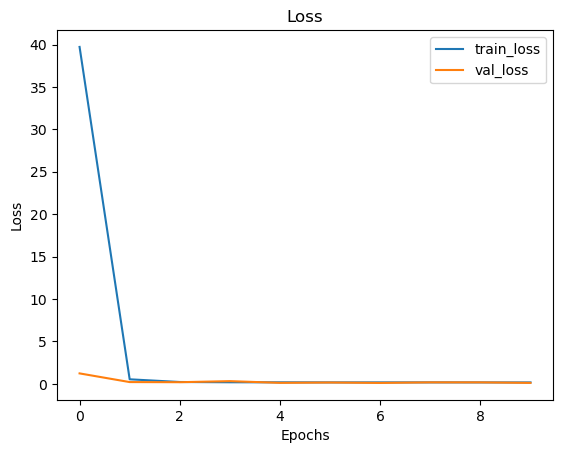

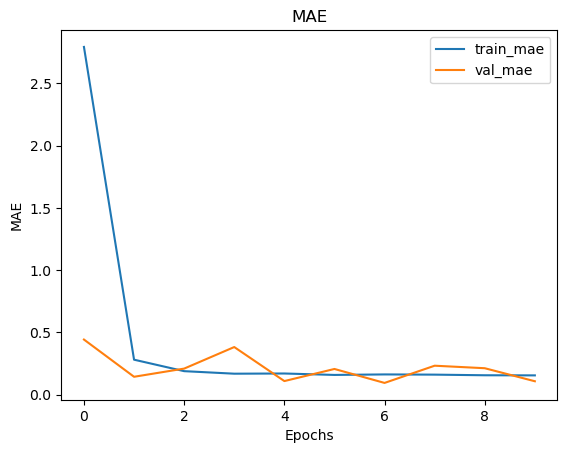

In [55]:
#Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
#Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
#Plotting the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plotting mae
plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.title('MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

